# 課題

In [72]:
import cv2, os, sys
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

## 1-画像を読み込み、HLS,HSV,Lab,YUV,YCrCbに変換し、横⽅向につなげて表⽰

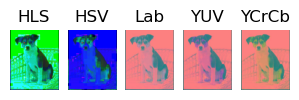

In [73]:
dog_img = cv2.imread("C:\\Users\\gokou\\practice\\0517_hsv\\dog193.jpg")

dog_hls = cv2.cvtColor(dog_img, cv2.COLOR_BGR2HLS)
dog_hsv = cv2.cvtColor(dog_img, cv2.COLOR_BGR2HSV)
dog_lab = cv2.cvtColor(dog_img, cv2.COLOR_BGR2Lab)
dog_yuv = cv2.cvtColor(dog_img, cv2.COLOR_BGR2YUV)
dog_ycr = cv2.cvtColor(dog_img, cv2.COLOR_BGR2YCrCb)

fig = plt.figure(figsize=(3.6, 14.35)) #サイズを指定
fig.set_facecolor('white')

ax1 = fig.add_subplot(1, 5, 1) #1個目
ax1.imshow(dog_hls)
ax1.set_title('HLS') #タイトル
ax1.axis('off')

ax2 = fig.add_subplot(1, 5, 2) #2個目
ax2.imshow(dog_hsv)
ax2.set_title('HSV')
ax2.axis('off')

ax3 = fig.add_subplot(1, 5, 3) #3個目
ax3.imshow(dog_lab)
ax3.set_title('Lab')
ax3.axis('off')

ax4 = fig.add_subplot(1, 5, 4) #4個目
ax4.imshow(dog_yuv)
ax4.set_title('YUV')
ax4.axis('off')

ax5 = fig.add_subplot(1, 5, 5) #5個目
ax5.imshow(dog_ycr)
ax5.set_title('YCrCb')
ax5.axis('off')

plt.show()

## 2-2枚の画像をブレンド

In [74]:
dog_img = cv2.imread("C:\\Users\\gokou\\practice\\0517_hsv\\dog193.jpg")
dog_rgb = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)

h,w,c = dog_img.shape
print(h,w,c)

360 287 3


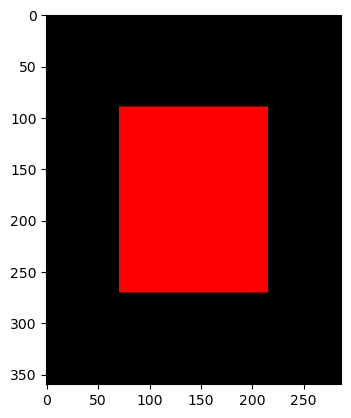

In [75]:
img_rec = np.zeros((h, w, 3), np.uint8)
cv2.rectangle(img_rec, (w//4, h//4), ((3*w)//4, (3*h)//4), (255, 0, 0), -1)

plt.imshow(img_rec)

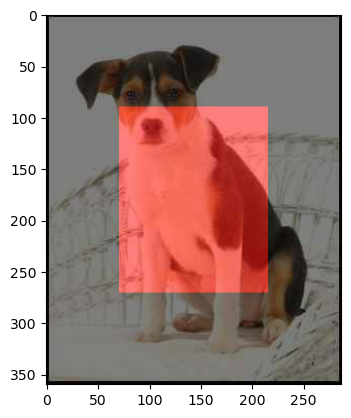

In [76]:
img_blend = cv2.addWeighted(dog_rgb, 0.5, img_rec, 0.5, gamma=0) #50%でブレンド
plt.imshow(img_blend)

## 3-threshパラメータが0, 50, 128, 200の時の画像をvconcatを使⽤して縦に並べて表⽰

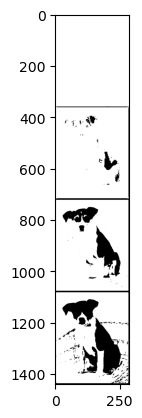

In [77]:
dog_img = cv2.imread("C:\\Users\\gokou\\practice\\0517_hsv\\dog193.jpg")
dog_gray = cv2.cvtColor(dog_img, cv2.COLOR_BGR2GRAY)

ret, dog_thresh0 = cv2.threshold(dog_gray, 0, 255, cv2.THRESH_BINARY)
ret, dog_thresh50 = cv2.threshold(dog_gray, 50, 255, cv2.THRESH_BINARY)
ret, dog_thresh128 = cv2.threshold(dog_gray, 128, 255, cv2.THRESH_BINARY)
ret, dog_thresh200 = cv2.threshold(dog_gray, 200, 255, cv2.THRESH_BINARY)

img_vconcat = cv2.vconcat([dog_thresh0, dog_thresh50, dog_thresh128, dog_thresh200])

plt.imshow(img_vconcat, 'gray')

## 4-THRESH_OTSU, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INVに変更し、結合を⽤いて表⽰

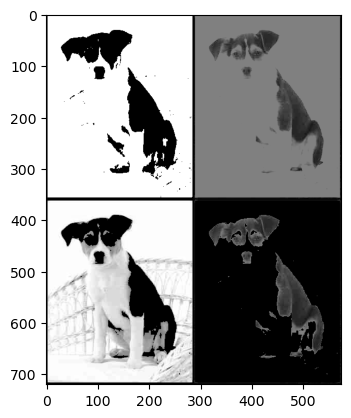

In [78]:
dog_img = cv2.imread("C:\\Users\\gokou\\practice\\0517_hsv\\dog193.jpg")
dog_gray = cv2.cvtColor(dog_img, cv2.COLOR_BGR2GRAY)

ret, thresh_otsu = cv2.threshold(dog_gray, 0, 255, cv2.THRESH_OTSU)
ret, thresh_trunc = cv2.threshold(dog_gray, 128, 255, cv2.THRESH_TRUNC)
ret, thresh_to = cv2.threshold(dog_gray, 128, 255, cv2.THRESH_TOZERO)
ret, thresh_to_inv = cv2.threshold(dog_gray, 128, 255, cv2.THRESH_TOZERO_INV)

img_vcon_left = cv2.vconcat([thresh_otsu, thresh_to])
img_vcon_right = cv2.vconcat([thresh_trunc, thresh_to_inv])

img_all = cv2.hconcat([img_vcon_left, img_vcon_right])

plt.imshow(img_all, 'gray')

## 5-adaptiveThresholdを⽤いてADAPTIVE_THRESH_GAUSSIAN_C,ADAPTIVE_THRESH_MEAN_Cの時の画像をそれぞれ表⽰

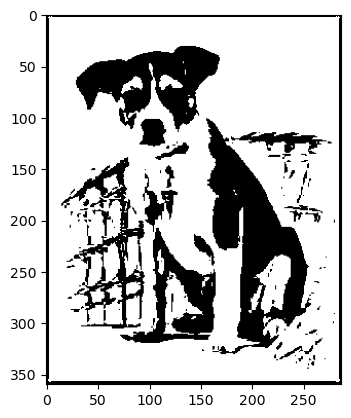

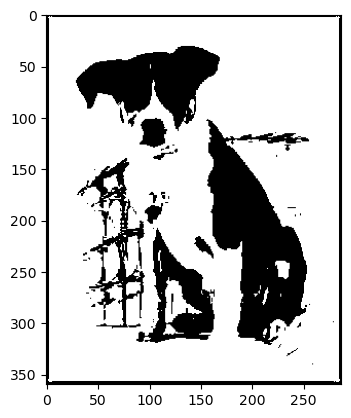

In [79]:
dog_img = cv2.imread("C:\\Users\\gokou\\practice\\0517_hsv\\dog193.jpg")
dog_gray = cv2.cvtColor(dog_img, cv2.COLOR_BGR2GRAY)

gaussian = cv2.adaptiveThreshold(dog_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 2)
plt.imshow(gaussian, 'gray')
plt.show()

mean = cv2.adaptiveThreshold(dog_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 2) #フィルターのサイズは同じ
plt.imshow(mean, 'gray')

## 6-threshold, gray, HSVを⾏列の結合を⽤いて並べ、BGR画像とブレンドして表⽰

In [80]:
dog_img = cv2.imread("C:\\Users\\gokou\\practice\\0517_hsv\\dog193.jpg")
dog_gray = cv2.cvtColor(dog_img, cv2.COLOR_BGR2GRAY)
dog_gray = cv2.merge((dog_gray, dog_gray, dog_gray)) #concatのときにshapeの違いでエラーにならないように
dog_rgb = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
ret, dog_thresh = cv2.threshold(dog_gray, 128, 255, cv2.THRESH_BINARY)
dog_hsv = cv2.cvtColor(dog_img, cv2.COLOR_BGR2HSV)

h,w,c = dog_img.shape

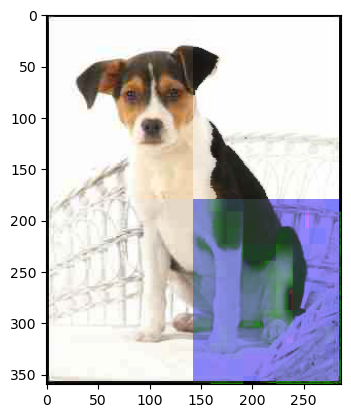

In [81]:
dog_con = np.zeros((h, w, c), np.uint8)

dog_con[:h//2, :w//2] = dog_rgb[:h//2, :w//2] #左上
dog_con[h//2:, :w//2] = dog_gray[h//2:, :w//2] #左下
dog_con[:h//2, w//2:] = dog_thresh[:h//2, w//2:] #右上
dog_con[h//2:, w//2:] = dog_hsv[h//2:, w//2:] #右下

dog_blend = cv2.addWeighted(dog_rgb, 0.5, dog_con, 0.5, gamma=0)

plt.imshow(dog_blend)